In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [37]:
image = cv2.imread("C:/Users/Jagadeesh/Downloads/Marc_Chagall.jpg")

In [38]:
image

array([[[ 98,  37,  41],
        [105,  45,  46],
        [109,  44,  46],
        ...,
        [ 42,  39,  35],
        [ 43,  40,  36],
        [ 43,  40,  36]],

       [[ 69,   4,   6],
        [ 80,  15,  17],
        [ 84,  18,  19],
        ...,
        [ 13,  10,   6],
        [ 13,  10,   6],
        [ 13,  10,   6]],

       [[ 85,  12,  14],
        [102,  30,  30],
        [113,  39,  37],
        ...,
        [ 31,  27,  26],
        [ 31,  27,  26],
        [ 30,  26,  25]],

       ...,

       [[ 61,  65,  30],
        [ 80,  84,  48],
        [ 96, 102,  61],
        ...,
        [ 36,  33,  29],
        [ 36,  33,  29],
        [ 36,  33,  29]],

       [[ 51,  53,  23],
        [ 72,  75,  43],
        [ 89,  93,  57],
        ...,
        [ 36,  33,  29],
        [ 36,  33,  29],
        [ 36,  33,  29]],

       [[ 43,  45,  15],
        [ 65,  68,  36],
        [ 84,  88,  52],
        ...,
        [ 36,  33,  29],
        [ 36,  33,  29],
        [ 36,  33,  29]]

In [39]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [40]:
rgb_image

array([[[ 41,  37,  98],
        [ 46,  45, 105],
        [ 46,  44, 109],
        ...,
        [ 35,  39,  42],
        [ 36,  40,  43],
        [ 36,  40,  43]],

       [[  6,   4,  69],
        [ 17,  15,  80],
        [ 19,  18,  84],
        ...,
        [  6,  10,  13],
        [  6,  10,  13],
        [  6,  10,  13]],

       [[ 14,  12,  85],
        [ 30,  30, 102],
        [ 37,  39, 113],
        ...,
        [ 26,  27,  31],
        [ 26,  27,  31],
        [ 25,  26,  30]],

       ...,

       [[ 30,  65,  61],
        [ 48,  84,  80],
        [ 61, 102,  96],
        ...,
        [ 29,  33,  36],
        [ 29,  33,  36],
        [ 29,  33,  36]],

       [[ 23,  53,  51],
        [ 43,  75,  72],
        [ 57,  93,  89],
        ...,
        [ 29,  33,  36],
        [ 29,  33,  36],
        [ 29,  33,  36]],

       [[ 15,  45,  43],
        [ 36,  68,  65],
        [ 52,  88,  84],
        ...,
        [ 29,  33,  36],
        [ 29,  33,  36],
        [ 29,  33,  36]]

In [41]:
rgb_image.shape

(867, 671, 3)

(-0.5, 670.5, 866.5, -0.5)

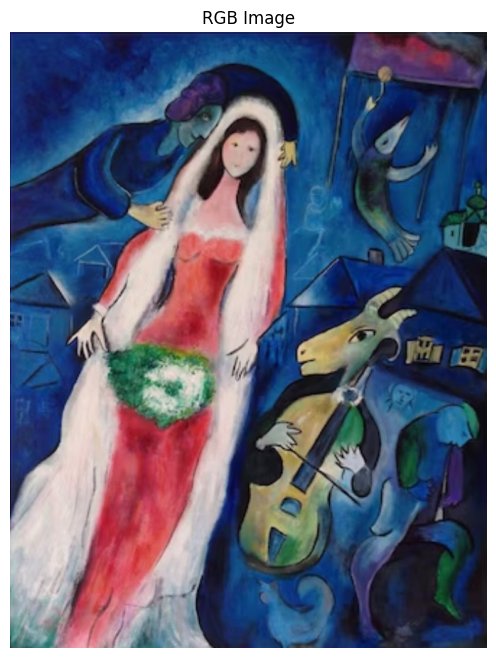

In [42]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")

In [43]:
import numpy as np

def rgb_to_cmyk(rgb_image):
    # Normalize the image to range [0, 1]
    rgb_normalized = rgb_image.astype(float) / 255.0
    
    # Extract individual channels
    R, G, B = rgb_normalized[..., 0], rgb_normalized[..., 1], rgb_normalized[..., 2]
    
    # Calculate the K (black) channel
    K = 1 - np.max(rgb_normalized, axis=-1)
    
    # Calculate C, M, Y channels
    C = (1 - R - K) / (1 - K + 1e-6)  # Added a small epsilon to avoid division by zero
    M = (1 - G - K) / (1 - K + 1e-6)
    Y = (1 - B - K) / (1 - K + 1e-6)
    
    # Handle edge cases (where K = 1)
    C[K == 1] = 0
    M[K == 1] = 0
    Y[K == 1] = 0
    
    # Stack the CMYK channels together
    cmyk_image = np.stack([C, M, Y, K], axis=-1)
    
    return cmyk_image

# Convert the RGB image to CMYK
cmyk_image = rgb_to_cmyk(rgb_image)

# Now, `cmyk_image` contains the CMYK values, in the range [0, 1].
print(cmyk_image.shape)  # To check the shape of the CMYK image


(867, 671, 4)


(-0.5, 670.5, 866.5, -0.5)

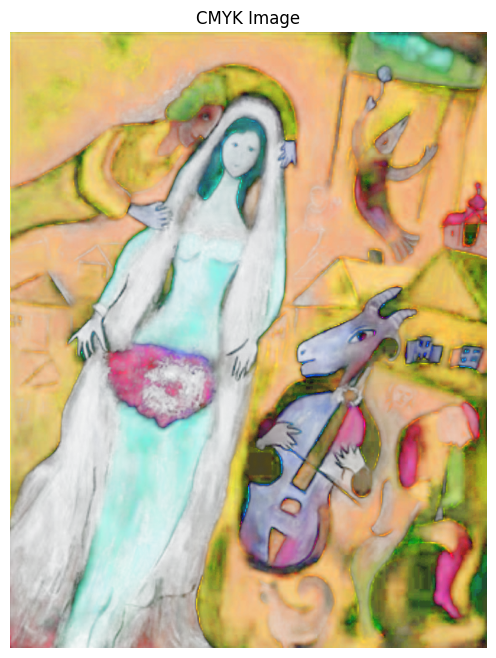

In [44]:
plt.figure(figsize=(8, 8))
plt.imshow(cmyk_image)
plt.title("CMYK Image")
plt.axis("off")

R channel shape: (867, 671)
G channel shape: (867, 671)
B channel shape: (867, 671)


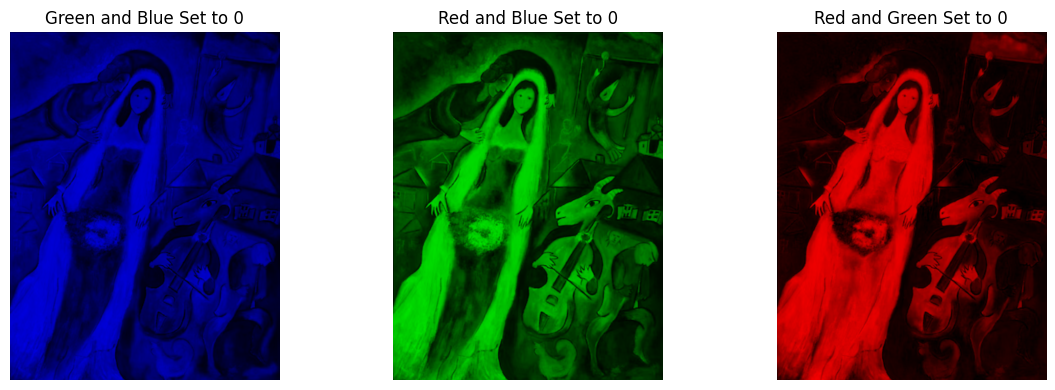

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming rgb_image is loaded correctly (double-check path)
rgb_image = cv2.imread('C:/Users/Jagadeesh/Downloads/Marc_Chagall.jpg')

# Split the image into Red, Green, and Blue channels
r, g, b = cv2.split(rgb_image)

# Print the shapes of the individual channels
print(f"R channel shape: {r.shape}")
print(f"G channel shape: {g.shape}")
print(f"B channel shape: {b.shape}")

# Modify the channels by setting the desired values to 0
rgb_image_gb_zero = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])
rgb_image_rb_zero = cv2.merge([np.zeros_like(r), g, np.zeros_like(b)])
rgb_image_rg_zero = cv2.merge([np.zeros_like(r), np.zeros_like(g), b])

# Display the modified images using OpenCV
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(rgb_image_gb_zero, cv2.COLOR_BGR2RGB))
plt.title("Green and Blue Set to 0")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rgb_image_rb_zero, cv2.COLOR_BGR2RGB))
plt.title("Red and Blue Set to 0")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rgb_image_rg_zero, cv2.COLOR_BGR2RGB))
plt.title("Red and Green Set to 0")
plt.axis('off')

plt.tight_layout()
plt.show()


In [68]:
cmy=1- rgb_image
plt.imshow(cmy)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("C:/Users/student/Downloads/Marc_Chagall.jpg")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert RGB to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Split HSV channels
h, s, v = cv2.split(hsv_image)

# Modify Hue, Saturation, and Value
h = cv2.add(h, 30)  # Modify Hue (increase by 30)
s = cv2.add(s, 50)  # Modify Saturation (increase by 50)
v = cv2.add(v, 50)  # Modify Value (increase by 50)

# Merge modified HSV channels
modified_hsv_image = cv2.merge([h, s, v])

# Convert back to RGB
modified_rgb_image = cv2.cvtColor(modified_hsv_image, cv2.COLOR_HSV2RGB)

# Plot original and modified images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_rgb_image)
plt.title('Modified Image (HSV Altered)')
plt.axis('off')

plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("C:/Users/student/Downloads/Marc_Chagall.jpg")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert RGB to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Modify Hue, Saturation, and Value directly
hsv_image[..., 0] = cv2.add(hsv_image[..., 0], 30)  # Modify Hue (increase by 30)
hsv_image[..., 1] = cv2.add(hsv_image[..., 1], 50)  # Modify Saturation (increase by 50)
hsv_image[..., 2] = cv2.add(hsv_image[..., 2], 50)  # Modify Value (increase by 50)

# Convert back to RGB
modified_rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Plot original and modified images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_rgb_image)
plt.title('Modified Image (HSV Altered)')
plt.axis('off')

plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("C:/Users/student/Downloads/Marc_Chagall.jpg")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert RGB to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Get the individual channels
h = hsv_image[:, :, 0]  # Hue channel
s = hsv_image[:, :, 1]  # Saturation channel
v = hsv_image[:, :, 2]  # Value channel

# Manually modify the Hue, Saturation, and Value
h = (h + 30) % 180  # Modify Hue by adding 30 and wrapping around using modulus 180 (OpenCV Hue range is 0-179)
s = np.clip(s + 50, 0, 255)  # Increase Saturation by 50, clipped to the range [0, 255]
v = np.clip(v + 50, 0, 255)  # Increase Value by 50, clipped to the range [0, 255]

# Reassemble the modified HSV image
modified_hsv_image = np.stack((h, s, v), axis=-1)

# Convert back to RGB
modified_rgb_image = cv2.cvtColor(modified_hsv_image, cv2.COLOR_HSV2RGB)

# Plot original and modified images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Modified Image
plt.subplot(1, 2, 2)
plt.imshow(modified_rgb_image)
plt.title('Modified Image (HSV Altered)')
plt.axis('off')

plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/student/Downloads/Marc_Chagall.jpg"
rgb_image = cv2.imread(image_path)

# Convert from BGR (OpenCV default) to RGB
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert RGB to CMY (Cyan, Magenta, Yellow)
cmyk_image = 1 - rgb_image / 255.0  # Normalize to [0, 1] range and invert to get CMY

# Split the CMY channels
c, m, y = cv2.split(cmyk_image)

# Modify the channels as per your request
# 1. Set Cyan and Magenta channels to 0 (only Yellow remains)
cmyk_image_cy_mg_zero = cv2.merge([np.zeros_like(c), np.zeros_like(m), y])

# 2. Set Cyan and Yellow channels to 0 (only Magenta remains)
cmyk_image_cy_yl_zero = cv2.merge([np.zeros_like(c), m, np.zeros_like(y)])

# 3. Set Magenta and Yellow channels to 0 (only Cyan remains)
cmyk_image_mg_yl_zero = cv2.merge([c, np.zeros_like(m), np.zeros_like(y)])

# Convert the CMY images back to RGB for proper display
rgb_cy_mg_zero = 255 * (1 - np.dstack([cmyk_image_cy_mg_zero[:, :, 0], cmyk_image_cy_mg_zero[:, :, 1], cmyk_image_cy_mg_zero[:, :, 2]]))
rgb_cy_yl_zero = 255 * (1 - np.dstack([cmyk_image_cy_yl_zero[:, :, 0], cmyk_image_cy_yl_zero[:, :, 1], cmyk_image_cy_yl_zero[:, :, 2]]))
rgb_mg_yl_zero = 255 * (1 - np.dstack([cmyk_image_mg_yl_zero[:, :, 0], cmyk_image_mg_yl_zero[:, :, 1], cmyk_image_mg_yl_zero[:, :, 2]]))

# Plot the modified CMY images
plt.figure(figsize=(12, 4))

# Show the image with Cyan and Magenta set to 0 (Yellow Only)
plt.subplot(1, 3, 1)
plt.imshow(rgb_cy_mg_zero.astype(np.uint8))
plt.title("Yellow Only (Cyan and Magenta Set to 0)")
plt.axis('off')

# Show the image with Cyan and Yellow set to 0 (Magenta Only)
plt.subplot(1, 3, 2)
plt.imshow(rgb_cy_yl_zero.astype(np.uint8))
plt.title("Magenta Only (Cyan and Yellow Set to 0)")
plt.axis('off')

# Show the image with Magenta and Yellow set to 0 (Cyan Only)
plt.subplot(1, 3, 3)
plt.imshow(rgb_mg_yl_zero.astype(np.uint8))
plt.title("Cyan Only (Magenta and Yellow Set to 0)")
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [55]:
image_rgb = image / 255.0

transformation_matrix = np.array([
 [0.299, 0.587, 0.114],
 [0.5957, -0.2746, -0.3213],
 [0.2115, -0.5227, 0.3113]])

reshaped_image = image_rgb.reshape(-1, 3)
yiq_image = reshaped_image.dot(transformation_matrix.T)
yiq_image = yiq_image.reshape(image_rgb.shape)
yiq_image = np.clip(yiq_image * 255, 0, 255).astype(np.uint8)
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(yiq_image)
plt.title("Converted YIQ Image")
plt.axis('off')
plt.show()
Y = yiq_image[:, :, 0]
I = yiq_image[:, :, 1]
Q = yiq_image[:, :, 2]

I = np.clip(I + 128, 0, 255)
Q = np.clip(Q + 128, 0, 255)
plt.figure(figsize=(13,7))
plt.subplot(2, 3, 1)
plt.imshow(Y)
plt.title("Y Channel")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(I)
plt.title("I Channel")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(Q)
plt.title("Q Channel")
plt.axis('off')

plt.show()

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'